In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
directory_path = "C:/Users/yousu/OneDrive/Python_Files/Movies"

csv_files = [file for file in os.listdir(directory_path) if file.endswith(".csv")]

print("Number of .csv files:", len(csv_files))

Number of .csv files: 4


### What is the shape of "movies.csv"?

In [3]:
df = pd.read_csv("movies.csv")

In [4]:
df.shape

(9742, 3)

### What is the shape of "ratings.csv"?

In [5]:
df1 = pd.read_csv("ratings.csv")
df1.shape

(100836, 4)

### How many unique "userId" are available in "ratings.csv"?

In [6]:
unique_id = df1['userId'].unique()
len(unique_id)

610

### Which movie has recieved maximum number of user ratings?

In [7]:
data_df = pd.merge(df1, df, on='movieId')

In [8]:
ratings_count = data_df.groupby('title')['userId'].count()
max_ratings_movie = ratings_count.idxmax()
print("Movie with the maximum number of user ratings:", max_ratings_movie)

Movie with the maximum number of user ratings: Forrest Gump (1994)


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [9]:
df2 = pd.read_csv("tags.csv")

In [10]:
data_df1 = pd.merge(df, df2, on='movieId')

In [11]:
tags = data_df1[data_df1['title'] == 'Matrix, The (1999)']['tag'].unique()
print("Tags for 'Matrix, The (1999)':", tags)

Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [12]:
terminator_ratings = data_df[data_df['title'] == 'Terminator 2: Judgment Day (1991)']['rating']
average_rating = terminator_ratings.mean()
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

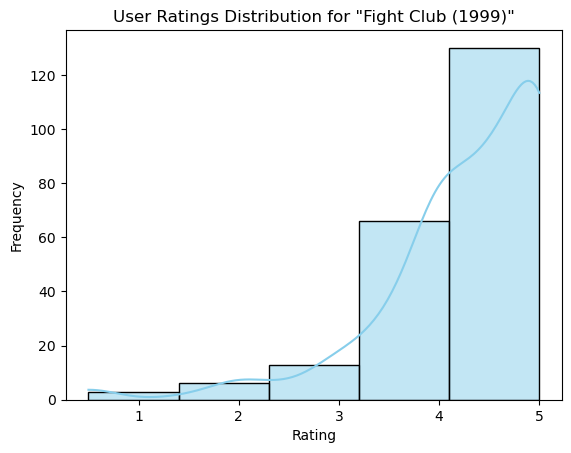

In [13]:
fight_club_ratings = data_df[data_df['title'] == 'Fight Club (1999)']['rating']

sns.histplot(fight_club_ratings, kde=True, bins=5, color='skyblue', edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\yousu\AppData\Local\Temp\ipykernel_13036\3554986735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[data_df['title'] == 'Fight Club (1999)']['rating'])


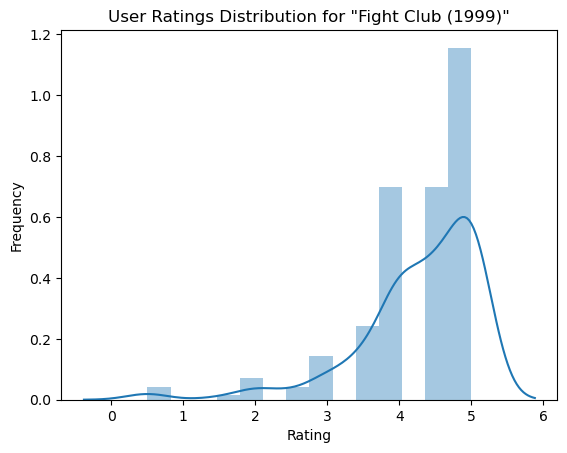

In [14]:
sns.distplot(data_df[data_df['title'] == 'Fight Club (1999)']['rating'])
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Which movie is the most popular based on  average user ratings?

In [15]:
ratings = df1.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings.columns = ['movieId', 'count_of_user_ratings', 'avg_rating']

data_df3 = pd.merge(df, ratings, on='movieId', how='inner')
data_df4 = data_df3[data_df3['count_of_user_ratings'] > 50]

data_df4

,movieId,title,genres,count_of_user_ratings,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [16]:
most_popular_movie = data_df4.loc[data_df4['avg_rating'].idxmax()]

print("Most popular movie based on average user ratings:")
print(most_popular_movie[['title', 'avg_rating']])

Most popular movie based on average user ratings:
title         Shawshank Redemption, The (1994)
avg_rating                            4.429022
Name: 277, dtype: object


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [17]:
top_5_movies = data_df4.sort_values(by='count_of_user_ratings', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'count_of_user_ratings']])

Top 5 popular movies based on number of user ratings:
                                 title  count_of_user_ratings
314                Forrest Gump (1994)                    329
277   Shawshank Redemption, The (1994)                    317
257                Pulp Fiction (1994)                    307
510   Silence of the Lambs, The (1991)                    279
1938                Matrix, The (1999)                    278


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [18]:
sci_fi_movies = data_df4[data_df4['genres'].str.contains('Sci-Fi')]

sci_fi_movies = sci_fi_movies.sort_values(by='count_of_user_ratings', ascending=False)

third_most_popular_sci_fi_movie = sci_fi_movies.iloc[2]
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi_movie[['title', 'count_of_user_ratings']])

Third most popular Sci-Fi movie based on number of user ratings:
title                    Jurassic Park (1993)
count_of_user_ratings                     238
Name: 418, dtype: object


### Mention the movieId of the movie which has the highest IMDB rating.

In [19]:
df4 = pd.read_csv("links.csv")

data_df5 = pd.merge(data_df4, df4, on='movieId')

In [20]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [21]:
scrapper(113497)

'7.1'

In [22]:
data_df5['imdb_rating'] = data_df5['imdbId'].apply(scrapper)

In [23]:
data_df5

,movieId,title,genres,count_of_user_ratings,avg_rating,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [24]:
data_df5['imdb_rating'] = data_df5['imdb_rating'].astype(float)

In [25]:
highest_rated_movie = data_df5.loc[data_df5['imdb_rating'].idxmax()]
print("Movie with the highest IMDb rating:")
print(highest_rated_movie[['movieId', 'title', 'imdb_rating']])

Movie with the highest IMDb rating:
movieId                                     318
title          Shawshank Redemption, The (1994)
imdb_rating                                 9.3
Name: 53, dtype: object


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [26]:
sci_fi_movies = data_df5[data_df5['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
print("Sci-Fi movie with the highest IMDb rating:")
print(highest_rated_sci_fi_movie[['movieId', 'title', 'imdb_rating']])

Sci-Fi movie with the highest IMDb rating:
movieId                   79132
title          Inception (2010)
imdb_rating                 8.8
Name: 424, dtype: object
